# Optimizing Functions of One Variable: Cost Minimization

In this assignment you will solve a simple optimization problem for a function of one variable. Given a dataset of historical prices of a product from two suppliers, your task is to identify what share of the product you should buy from each of the suppliers to make the best possible investment in the future. Stating the problem mathematically, you will construct a target function to minimize, evaluate its minimum and investigate how its derivative is connected with the result.

# Table of Contents

- [ 1 - Statement of the Optimization Problem](#1)
  - [ 1.1 - Description of the Problem](#1.1)
  - [ 1.2 - Mathematical Statement of the Problem](#1.2)
  - [ 1.3 - Solution Approach](#1.3)
- [ 2 - Optimizing Function of One Variable in Python](#2)
  - [ 2.1 - Packages](#2.1)
  - [ 2.2 - Open and Analyze the Dataset](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 - Construct the Function $L$ to Optimize and Find its Minimum Point](#2.3)
    - [ Exercise 2](#ex02)
    - [ Exercise 3](#ex03)
    - [ Exercise 4](#ex04)

<a name='1'></a>
## 1 - Statement of the Optimization Problem

<a name='1.1'></a>
### 1.1 - Description of the Problem

Your Company is aiming to minimize production costs of some goods. During the production process, an essential product P is used, which can be supplied from one of two partners - supplier A and supplier B. Your consultants requested the historical prices of product P from both suppliers A and B, which were provided as monthly averages for the period from February 2018 to March 2020.

Preparing Company Budget for the coming twelve months period, your plan is to purchase the same amount of product P monthly. Choosing the supplier, you noticed, that there were some periods in the past, when it would be more profitable to use supplier A (the prices of product P were lower), and other periods to work with supplier B. For the Budget model you can set some percentage of the goods to be purchased from supplier A (e.g. 60%) and the remaining part from supplier B (e.g. 40%), but this split should be kept consistent for the whole of the twelve months period. The Budget will be used in preparation for the contract negotiations with both suppliers.

Based on the historical prices, is there a particular percentage which will be more profitable to supply from Company A, and the remaining part from Company B? Or maybe it does not matter and you can work just with one of the suppliers?

<a name='1.2'></a>
### 1.2 - Mathematical Statement of the Problem

Denoting prices of the product P from Company A and Company B as $p_A$ (USD) and $p_B$ (USD) respectively, and the volume of the product to be supplied per month as $n$ (units), the total cost in USD is:

$$f\left(\omega\right) = p_A \omega \,n+ p_B \left(1 - \omega\right) n,$$

where $0\leq\omega\leq1$ is the parameter. If $\omega = 1$, all goods will be supplied from Company A, and if $\omega = 0$, from Company B. In case of $0<\omega<1$, some percentage will be allocated to both. 

As it is planned to keep the volume $n$ constant over the next twelve months, in the mathematical model the common approach is to put $n = 1$. You can do this, because nothing depends on the volume and the end result will be the same. Now the total cost will be simpler:

$$f\left(\omega\right) = p_A \omega+ p_B \left(1 - \omega\right) \tag{1}$$

Obviously, you do not know the future prices $p_A$ and $p_B$, only historical values (prices $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$ for $k$ months). And historically there were various periods of time when it was better to take $\omega = 1$ ($p_A^i < p_B^i$) or $\omega = 0$ ($p_A^i >p_B^i$). Is it possible now to choose some $\omega$ value that would provide some evidence of minimum costs in the future?

<a name='1.3'></a>
### 1.3 - Solution Approach

This is a standard **portfolio management** (investment) problem well known in statistics, where based on the historical prices you need to make investment decision to maximize profit (minimize costs). Since statistics has not been covered in this Course, you do not need to understand the details about the function $\mathcal{L}\left(\omega\right)$ (called **loss function**) to minimize, explained in the next paragraph.

The approach is to calculate $f\left(\omega\right)$ for each of the historical prices $p_A^i$ and $p_B^i$, $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$. Then take an average of those values, $\overline{f\left (\omega\right)}=\text{mean}\left(f^i\left(\omega\right)\right) = \frac{1}{k}\sum_{i=1}^{k}f^i\left(\omega\right)$ and look for such value of $\omega$ which makes $f^i\left(\omega\right)$ as "stable" as possible - varying as little as possible from the average $\overline{f\left (\omega\right)}$. This means that you would want to minimize the sum of the differences $\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)$. As the differences can be negative or positive, a common approach is to take the squares of those and take an average of the squares:

$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2\tag{2}$$

In statistics $\mathcal{L}\left(\omega\right)$ is called a variance of $\{f^1 \left(\omega\right), \cdots , f^k \left(\omega\right)\}$. The aim is to minimize the variance $\mathcal{L}\left(\omega\right)$, where $\omega\in\left[0, 1\right]$. Again, do not worry if you do not understand deeply why particularly this function $\mathcal{L}\left(\omega\right)$ was chosen. You might think if it is logical to minimize an average $\overline{f\left (\omega\right)}$, but [risk management](https://www.thebalancemoney.com/minimum-variance-portfolio-overview-4155796#:~:text=A%20minimum%20variance%20portfolio%20is,other%20out%20when%20held%20together.) theory states that in this problem variance needs to be optimized.

Statistical theory shows that there is an $\omega\in\left[0, 1\right]$ value which minimizes function $\mathcal{L}\left(\omega\right)$ and it can be found using some properties of the datasets $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$. However, as this is not a Course about statistics, the example is taken to illustrate an optimization problem of one variable based on some dataset. It is a chance for you to check your understanding and practice this week material. 

Now let's upload a dataset and explore if it is possible to find a minimum point for the corresponding function $\mathcal{L}\left(\omega\right)$.

<a name='2'></a>
## 2 - Optimizing Function of One Variable in Python

<a name='2.1'></a>
### 2.1 - Packages

Let's import all of the required packages. In addition to the ones you have been using in this Course before, you will need to import `pandas` library. It is a commonly used package for data manipulation and analysis. 

In [94]:
# A function to perform automatic differentiation.
from jax import grad
# A wrapped version of NumPy to use JAX primitives.
import jax.numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# A magic command to make output of plotting commands displayed inline within the Jupyter notebook.
%matplotlib inline 

Load the unit tests defined for this notebook.

In [95]:
import w1_unittest

# Please ignore the warning message about GPU/TPU if it appears.

<a name='2.2'></a>
### 2.2 - Open and Analyze the Dataset

Historical prices for both suppliers A and B are saved in the file `data/prices.csv`. To open it you can use `pandas` function `read_csv`. This example is very simple, there is no need to use any other parameters.

In [96]:
df = pd.read_csv('data/prices.csv')

The data is now saved in the variable `df` as a **DataFrame**, which is the most commonly used `pandas` object. It is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a table or a spreadsheet. Full documentation can be found [here](https://pandas.pydata.org/).

View the data with a standard `print` function:

In [97]:
print(df)

         date  price_supplier_a_dollars_per_item  \
0   1/02/2016                                104   
1   1/03/2016                                108   
2   1/04/2016                                101   
3   1/05/2016                                104   
4   1/06/2016                                102   
5   1/07/2016                                105   
6   1/08/2016                                114   
7   1/09/2016                                102   
8   1/10/2016                                105   
9   1/11/2016                                101   
10  1/12/2016                                109   
11  1/01/2017                                103   
12  1/02/2017                                 93   
13  1/03/2017                                 98   
14  1/04/2017                                 92   
15  1/05/2017                                 97   
16  1/06/2017                                 96   
17  1/07/2017                                 94   
18  1/08/201

To print a list of the column names use `columns` attribute of the DataFrame:

In [98]:
print(df.columns)

Index(['date', 'price_supplier_a_dollars_per_item',
       'price_supplier_b_dollars_per_item'],
      dtype='object')


Reviewing the displayed table and the column names you can conclude that monthly prices are provided (in USD) and you only need the data from the columns `price_supplier_a_dollars_per_item` and `price_supplier_b_dollars_per_item`. In real life the datasets are significantly larger and require a proper review and cleaning before injection into models. But this is not the focus of this Course. 

To access the values of one column of the DataFrame you can use the column name as an attribute. For example, the following code will output `date` column of the DataFrame `df`:

In [99]:
df.date

0     1/02/2016
1     1/03/2016
2     1/04/2016
3     1/05/2016
4     1/06/2016
5     1/07/2016
6     1/08/2016
7     1/09/2016
8     1/10/2016
9     1/11/2016
10    1/12/2016
11    1/01/2017
12    1/02/2017
13    1/03/2017
14    1/04/2017
15    1/05/2017
16    1/06/2017
17    1/07/2017
18    1/08/2017
19    1/09/2017
20    1/10/2017
21    1/11/2017
22    1/12/2017
23    1/01/2018
24    1/02/2018
25    1/03/2018
26    1/04/2018
27    1/05/2018
28    1/06/2018
29    1/07/2018
30    1/08/2018
31    1/09/2018
32    1/10/2018
33    1/11/2018
34    1/12/2018
35    1/01/2019
36    1/02/2019
37    1/03/2019
38    1/04/2019
39    1/05/2019
40    1/06/2019
41    1/07/2019
42    1/08/2019
43    1/09/2019
44    1/10/2019
45    1/11/2019
46    1/12/2019
47    1/01/2020
48    1/02/2020
49    1/03/2020
Name: date, dtype: object

<a name='ex01'></a>
### Exercise 1

Load the historical prices of supplier A and supplier B into variables `prices_A` and `prices_B`, respectively. Convert the price values into `NumPy` arrays with elements of type `float32` using `np.array` function.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>The corresponding prices are in the DataFrame `df`, columns `price_supplier_a_dollars_per_item` and `price_supplier_b_dollars_per_item`.</li>
    <li>Conversion into the `NumPy` array can be performed with the function `np.array`.</li>
</ul>
</p>

In [100]:
### START CODE HERE ### (~ 4 lines of code)
prices_A = df.price_supplier_a_dollars_per_item
prices_B = df.price_supplier_b_dollars_per_item
prices_A = np.array(df.price_supplier_a_dollars_per_item).astype('float32')
prices_B = np.array(df.price_supplier_b_dollars_per_item).astype('float32')
### END CODE HERE ###

In [101]:
# Print some elements and mean values of the prices_A and prices_B arrays.
print("Some prices of supplier A:", prices_A[0:5])
print("Some prices of supplier B:", prices_B[0:5])
print("Average of the prices, supplier A:", np.mean(prices_A))
print("Average of the prices, supplier B:", np.mean(prices_B))

Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]
Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0


##### __Expected Output__ 

```Python
Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]
Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0
```

In [102]:
w1_unittest.test_load_and_convert_data(prices_A, prices_B)

 All tests passed


Average prices from both suppliers are similar. But if you will plot the historical prices, you will see that there were periods of time when the prices were lower for supplier A, and vice versa.

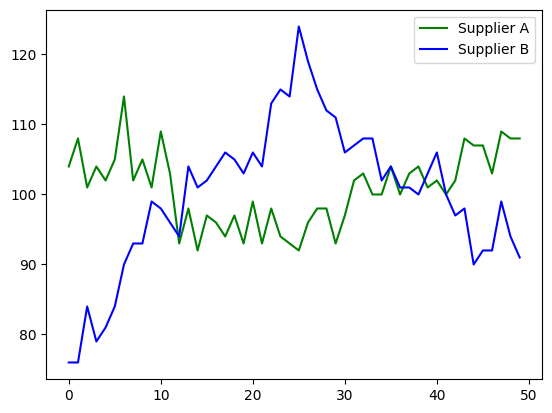

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(prices_A, 'g', label="Supplier A")
plt.plot(prices_B, 'b', label="Supplier B")
plt.legend()

plt.show()

Based on the historical data, can you tell which supplier it will be more profitable to work with? As discussed in the section [1.3](#1.3), you need to find such an $\omega \in \left[0, 1\right]$ which will minimize function $(2)$.

<a name='2.3'></a>
### 2.3 - Construct the Function $\mathcal{L}$ to Optimize and Find its Minimum Point

<a name='ex02'></a>
### Exercise 2

Calculate `f_of_omega`, corresponding to the $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$. Prices $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$ can be passed in the arrays `pA` and `pB`. Thus, multiplying them by the scalars `omega` and `1 - omega` and adding together the resulting arrays, you will get an array containing $\{f^1\left(\omega\right), \cdots, f^k\left(\omega\right)\}$.


Then array `f_of_omega` can be taken to calculate `L_of_omega`, according to the expression $(2)$:

$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2$$

In [104]:
def f_of_omega(omega, pA, pB):
    ### START CODE HERE ### (~ 1 line of code)
    f = pA*omega + pB*(1-omega)
    ### END CODE HERE ###
    return f

def L_of_omega(omega, pA, pB):
    return 1/len(f_of_omega(omega, pA, pB)) * np.sum((f_of_omega(omega, pA, pB) - np.mean(f_of_omega(omega, pA, pB)))**2)

In [105]:
print("L(omega = 0) =",L_of_omega(0, prices_A, prices_B))
print("L(omega = 0.2) =",L_of_omega(0.2, prices_A, prices_B))
print("L(omega = 0.8) =",L_of_omega(0.8, prices_A, prices_B))
print("L(omega = 1) =",L_of_omega(1, prices_A, prices_B))

L(omega = 0) = 110.72
L(omega = 0.2) = 61.1568
L(omega = 0.8) = 11.212797
L(omega = 1) = 27.48


##### __Expected Output__ 

```Python
L(omega = 0) = 110.72
L(omega = 0.2) = 61.1568
L(omega = 0.8) = 11.212797
L(omega = 1) = 27.48
```

In [106]:
w1_unittest.test_f_of_omega(f_of_omega)

 All tests passed


Analysing the output above, you can notice that values of the function $\mathcal{L}$ are decreasing for $\omega$ increasing from $0$ to $0.2$, then to $0.8$, but there is an increase of the function $\mathcal{L}$ when $\omega = 1$. What will be the $\omega$ giving the minimum value of the function $\mathcal{L}$?

In this simple example $\mathcal{L}\left(\omega\right)$ is a function of one variable and the problem of finding its minimum point with a certain accuracy is a trivial task. You just need to calculate function values for each $\omega = 0, 0.001, 0.002, \cdots , 1$ and find minimum element of the resulting array.

Function `L_of_omega` will not work if you will pass an array instead of a single value of `omega` (it was not designed for that). It is possible to rewrite it in a way that it would be possible, but here there is no need in that right now - you can calculate the resulting values in the loop as there will be not as many of them.

<a name='ex03'></a>
### Exercise 3

Evaluate function `L_of_omega` for each of the elements of the array `omega_array` and pass the result into the corresponding element of the array `L_array` with the function `.at[<index>].set(<value>)`.

*Note*: `jax.numpy` has been uploaded instead of the original `NumPy`. Up to this moment `jax` functionality has not been actually used, but it will be called in the cells below. Thus there was no need to upload both versions of the package, and you have to use `.at[<index>].set(<value>)` function to update the array.

In [107]:
# Parameter endpoint=True will allow ending point 1 to be included in the array.
# This is why it is better to take N = 1001, not N = 1000
N = 1001
omega_array = np.linspace(0, 1, N, endpoint=True)

# This is organised as a function only for grading purposes.
def L_of_omega_array(omega_array, pA, pB):
    N = len(omega_array)
    L_array = np.zeros(N)

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        L = L_of_omega(omega_array[i], pA, pB)
        L_array = omega_array.at[i].set(L)
        ### END CODE HERE ###
        
    return L_array

L_array = L_of_omega_array(omega_array, prices_A, prices_B)

In [108]:
print("L(omega = 0) =",L_array[0])
print("L(omega = 1) =",L_array[N-1])

L(omega = 0) = 0.0
L(omega = 1) = 27.48


##### __Expected Output__ 

```Python
L(omega = 0) = 110.72
L(omega = 1) = 27.48
```

In [109]:
w1_unittest.test_L_of_omega_array(L_of_omega_array)

Test case "default_check". Wrong output of L_of_omega_array for omega_array = 
[0.        0.001     0.002     ... 0.998     0.9990001 1.       ]
Test for index i = 0. 
	Expected: 
110.72
	Got: 
0.0
Test case "default_check". Wrong output of L_of_omega_array for omega_array = 
[0.        0.001     0.002     ... 0.998     0.9990001 1.       ]
Test for index i = 400. 
	Expected: 
28.051199
	Got: 
0.4000000059604645
Test case "extra_check". Wrong output of L_of_omega_array for omega_array = 
[0.         0.1        0.2        0.3        0.4        0.5
 0.6        0.7        0.8        0.90000004 1.        ]
Test for index i = 0. 
	Expected: 
110.72
	Got: 
0.0
Test case "extra_check". Wrong output of L_of_omega_array for omega_array = 
[0.         0.1        0.2        0.3        0.4        0.5
 0.6        0.7        0.8        0.90000004 1.        ]
Test for index i = 5. 
	Expected: 
17.67
	Got: 
0.5
 4  Tests passed
 4  Tests failed


Now a minimum point of the function $\mathcal{L}\left(\omega\right)$ can be found with a `NumPy` function `argmin()`. As there were $N = 1001$ points taken in the segment $\left[0, 1\right]$, the result will be accurate to three decimal places:

In [110]:
i_opt = L_array.argmin()
omega_opt = omega_array[i_opt]
L_opt = L_array[i_opt]
print(f'omega_min = {omega_opt:.3f}\nL_of_omega_min = {L_opt:.7f}')

omega_min = 0.000
L_of_omega_min = 0.0000000


This result means that, based on the historical data, $\omega = 0.702$ is expected to be the most profitable choice for the share between suppliers A and B. It is reasonable to plan $70.2\%$ of product P to be supplied from Company A, and $29.8\%$ from Company B. 

If you would like to improve the accuracy, you just need to increase the number of points N. This is a very simple example of a model with one parameter, resulting in optimization of a function of one variable. It is computationally cheap to evaluate it in many points to find the minimum with certain accuracy. But in machine learning the models have hundreds of parameters, using similar approach you would need to perform millions of target function evaluations. This is not possible in most of the cases, and that's where Calculus with its methods and approaches comes into play. 

In the next weeks of this Course you will learn how to optimize multivariate functions using differentiation. But for now as you are on the learning curve, let's evaluate the derivative of the function $\mathcal{L}\left(\omega\right)$ at the points saved in the array `omega_array` to check that at the minimum point the derivative is actually the closest to zero. 

<a name='ex04'></a>
### Exercise 4

For each $\omega$ in the `omega_array` calculate $\frac{d\mathcal{L}}{d\omega}$ using `grad()` function from `JAX` library. Remember that you need to pass the function which you want to differentiate (here $\mathcal{L}\left(\omega\right)$) as an argument of `grad()` function and then evaluate the derivative for the corresponding element of the `omega_array`. Then pass the result into the corresponding element of the array `dLdOmega_array` with the function `.at[<index>].set(<value>)`.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>Function $\mathcal{L}\left(\omega\right)$ is implemented in the code as `L_of_omega`.</li>
</ul>
</p>

In [123]:
import jax
from jax import grad
import jax.numpy as jnp

# This is organised as a function only for grading purposes.
def dLdOmega_of_omega_array(omega_array, pA, pB):
    N = len(omega_array)
    dLdOmega_array = np.zeros(N)

    for i in range(N):
        ### START CODE HERE ### (~ 2 lines of code)
        dLdOmega = grad(L_of_omega)(omega_array[i], pA, pB)
        dLdOmega_array = dLdOmega_array.at[i].set(dLdOmega)
        ### END CODE HERE ###
        
    return dLdOmega_array

dLdOmega_array = dLdOmega_of_omega_array(omega_array, prices_A, prices_B)

In [124]:
print("dLdOmega(omega = 0) =",dLdOmega_array[0])
print("dLdOmega(omega = 1) =",dLdOmega_array[N-1])

dLdOmega(omega = 0) = -288.96
dLdOmega(omega = 1) = 122.47999


##### __Expected Output__ 

```Python
dLdOmega(omega = 0) = -288.96
dLdOmega(omega = 1) = 122.47999
```

In [125]:
w1_unittest.test_dLdOmega_of_omega_array(dLdOmega_of_omega_array)

 All tests passed


Now to find the closest value of the derivative to $0$, take absolute values $\left|\frac{d\mathcal{L}}{d\omega}\right|$ for each omega and find minimum of them.

In [126]:
i_opt_2 = np.abs(dLdOmega_array).argmin()
omega_opt_2 = omega_array[i_opt_2]
dLdOmega_opt_2 = dLdOmega_array[i_opt_2]
print(f'omega_min = {omega_opt_2:.3f}\ndLdOmega_min = {dLdOmega_opt_2:.7f}')

omega_min = 0.702
dLdOmega_min = -0.1290760


The result is the same: $\omega = 0.702$. Let's plot $\mathcal{L}\left(\omega\right)$ and $\frac{d\mathcal{L}}{d\omega}$ to visualize the graphs of them, minimum point of the function $\mathcal{L}\left(\omega\right)$ and the point where its derivative is around $0$:

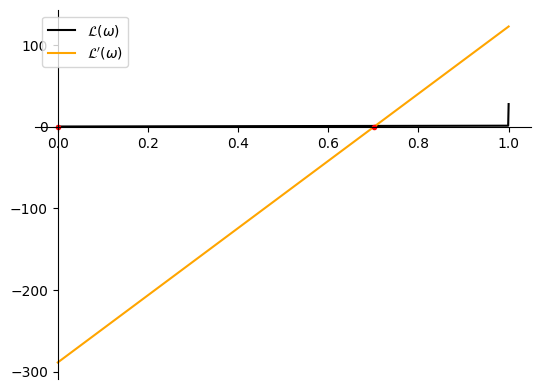

In [129]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Setting the axes at the origin.
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(omega_array,  L_array, "black", label = "$\mathcal{L}\\left(\omega\\right)$")
plt.plot(omega_array,  dLdOmega_array, "orange", label = "$\mathcal{L}\'\\left(\omega\\right)$")
plt.plot([omega_opt, omega_opt_2], [L_opt,dLdOmega_opt_2], 'ro', markersize=3)

plt.legend()

plt.show()

Congratulations, you have finished the assignment for this week! This example illustrates how optimization problems may appear in real life, and gives you an opportunity to explore the simple case of minimizing a function with one variable. Now it is time to learn about optimization of multivariate functions!